<a href="https://colab.research.google.com/github/burntato/Analyzing-Suicidal-Behaviours-py/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we have a data for Questionable behaviours of the students in various classes. We have to predict the behaviour of the students based on the given data.

But before we start predicting, we need to explore the data and see what we have.

We have a file named sr.csv which contains the data. We will use pandas to read the data.

In [ ]:
# declaring pandas as pd
import pandas as pd

Now that we have imported pandas, we can read the data using the read_csv function.

In [ ]:
# reading the csv file
df = pd.read_csv('sr.csv')

# printing the first 5 rows of the dataframe
df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


Let's look at the columns of the data.

In [ ]:
# here's how to get the column names
df.columns

Index(['Country', 'Year', 'Age Group', 'Sex', 'Currently_Drink_Alcohol',
       'Really_Get_Drunk', 'Overwieght', 'Use_Marijuana',
       'Have_Understanding_Parents', 'Missed_classes_without_permssion',
       'Had_sexual_relation', 'Smoke_cig_currently', 'Had_fights', 'Bullied',
       'Got_Seriously_injured', 'No_close_friends', 'Attempted'],
      dtype='object')

Now let's look at data distribution

In [ ]:
df.describe()

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,104.000000,106.000000,102.000000,106.000000,106.000000,106.000000
mean,2014.698113,31.815094,22.496226,23.694340,7.642453,33.190566,29.996226,26.679245,15.546154,32.448113,31.109804,43.723679,7.744340,14.452830
std,2.089292,53.454089,16.553129,15.764075,8.713536,11.559408,10.786728,17.401318,10.748501,15.297701,14.185479,14.808421,4.365254,9.273621
min,2010.000000,1.400000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,2.700000
25%,2013.000000,11.550000,9.000000,11.400000,2.025000,25.825000,22.450000,12.600000,7.050000,20.750000,21.775000,34.800000,4.500000,9.400000
50%,2015.000000,26.000000,19.650000,21.800000,4.350000,33.400000,28.950000,22.350000,12.600000,29.650000,27.550000,41.400000,6.950000,11.850000
75%,2016.000000,42.350000,30.475000,31.850000,9.575000,40.850000,36.825000,37.100000,22.000000,42.700000,41.150000,53.150000,9.700000,18.425000
max,2018.000000,548.000000,80.200000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,67.200000


Before we start visualizing the data, we need to make sure there are no dupes and nulls available in the data.

In [ ]:
# duplicate data check
df.duplicated().sum()

0

In [ ]:
# null value check
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 2
Had_fights                          0
Bullied                             4
Got_Seriously_injured               0
No_close_friends                    0
Attempted                           0
dtype: int64

We can see that there are nulls for Smoke_cig_currently and Bullied columns.

Instead of replacing them with zeros, we can just put mean values for the columns.

In [ ]:
# first, define the columns
df['Bullied'] = df['Bullied'].fillna(df['Bullied'].median())

# same thing goes for the other columns
df['Smoke_cig_currently'] = df['Smoke_cig_currently'].fillna(df['Smoke_cig_currently'].median())

# check for null values again
df.isnull().sum()

Country                             0
Year                                0
Age Group                           0
Sex                                 0
Currently_Drink_Alcohol             0
Really_Get_Drunk                    0
Overwieght                          0
Use_Marijuana                       0
Have_Understanding_Parents          0
Missed_classes_without_permssion    0
Had_sexual_relation                 0
Smoke_cig_currently                 0
Had_fights                          0
Bullied                             0
Got_Seriously_injured               0
No_close_friends                    0
Attempted                           0
dtype: int64

Now we can start visualizing the data.

Here are the raw data that we are about to visualize.<br>

Country = object<br>
Year = int64<br>
Age Group = object<br>
Sex = object<br>
Currently_Drink_Alcohol = float64<br>
Really_Get_Drunk = float64<br>
Overweight = float64<br>
Use_Marijuana = float64<br>
Have_Understanding_Parents = float64<br>
Missed_classes_without_permission = float64<br>
Had_sexual_relation = float64<br>
Smoke_cig_currently = float64<br>
Had_fights = float64<br>
Bullied = float64<br>
Got_Seriously_injured = float64<br>
No_close_friends = float64<br>
Attempted = float64<br>

We can see that there are 17 columns in the data.<br>

Now let's visualize the data.<br>

Visualizing will help us understand the data better, and will help us deciding the features to be used for prediction.<br>

This, in the end will help us decide the model to be used for prediction.<br>

With all of that, we can now start visualizing the data.<br>

In [ ]:
# we'll be using seaborn for visualization
import seaborn as sns

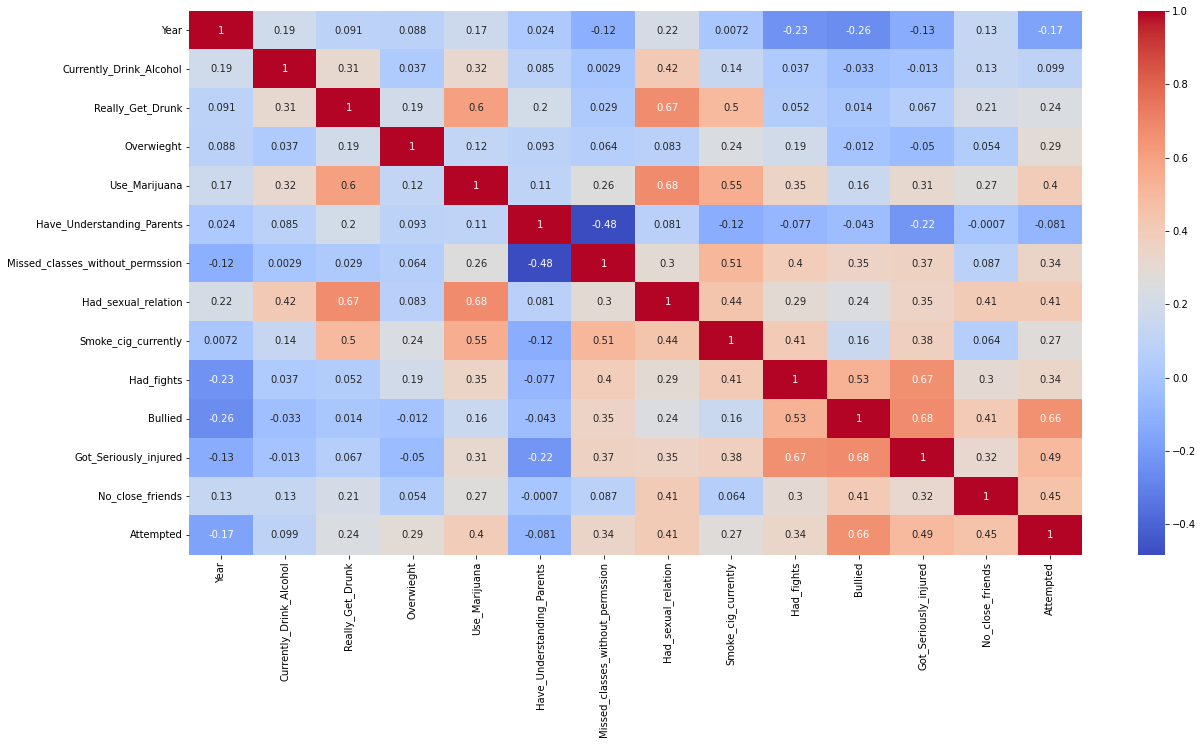

In [ ]:
df_num = df.select_dtypes(exclude='object')
# why exclude object? because we can't plot strings, obviously

# looks like the heatmap is too small, let's make it bigger
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# now let's plot the heatmap again
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')

Looking at the heatmap, we can see that there are some columns which are highly correlated.

Those columns are:

Really_Get_Drunk and Currently_Drink_Alcohol by

Use_Marijuana and Currently_Drink_Alcohol

Use_Marijuana and Really_Get_Drunk

Have_Understanding_Parents and Missed_classes_without_permission

Had_sexual_relation and Missed_classes_without_permission

Smoke_cig_currently and Missed_classes_without_permission

Had_fights and Missed_classes_without_permission

Bullied and Missed_classes_without_permission

Got_Seriously_injured and Missed_classes_without_permission

No_close_friends and Missed_classes_without_permission

Attempted and Missed_classes_without_permission

For a total of 11 correlated columns.

We can actually display the correlation values in a table.

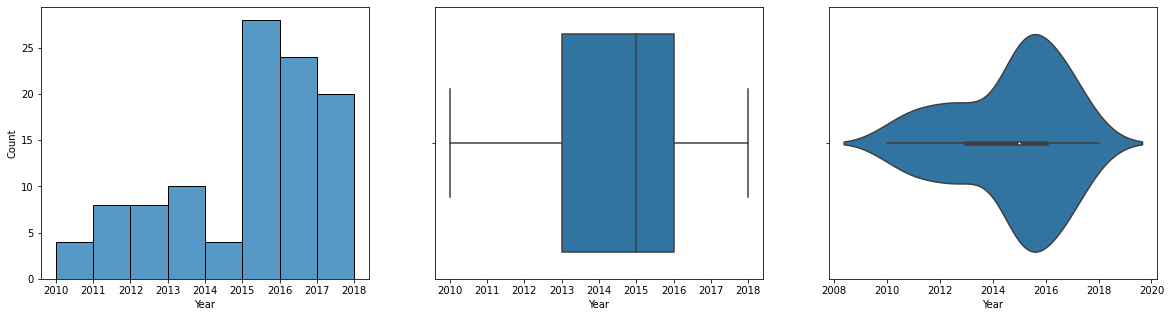

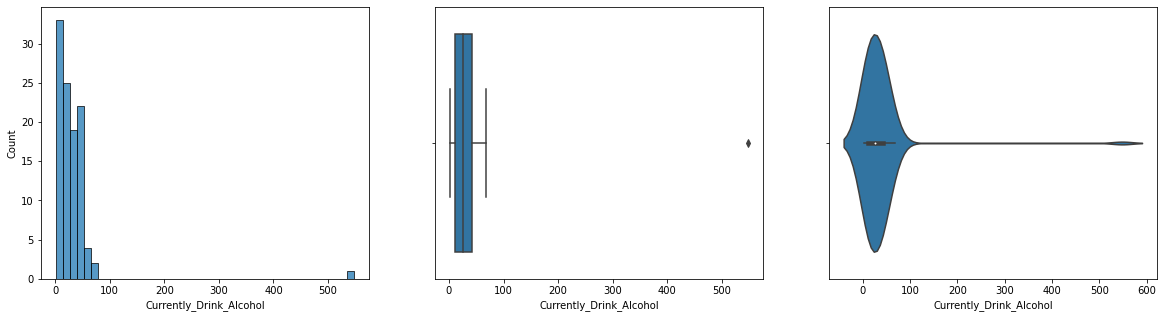

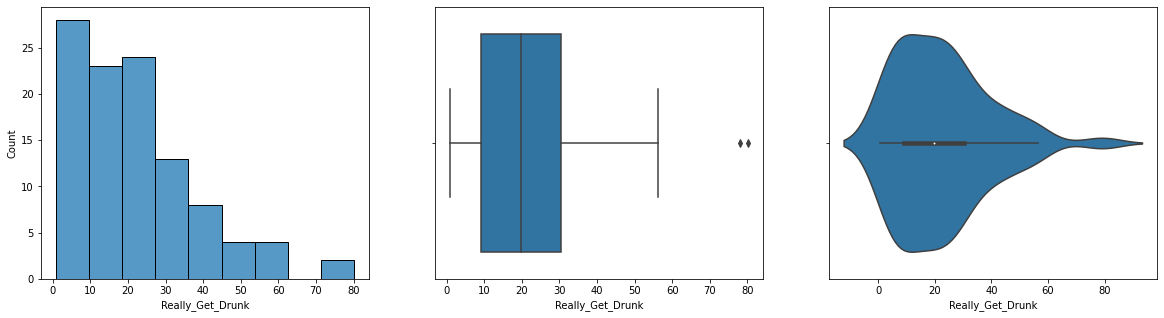

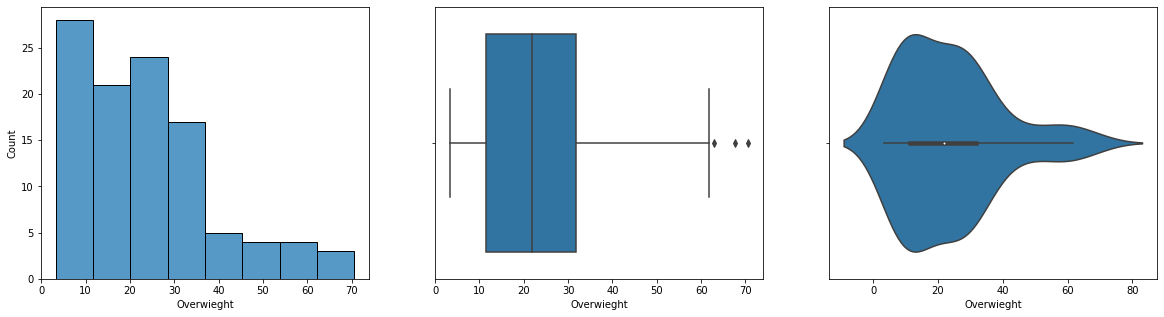

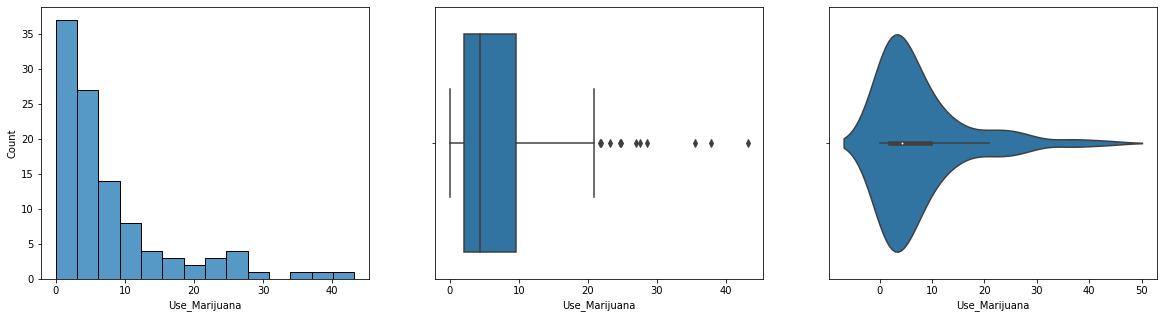

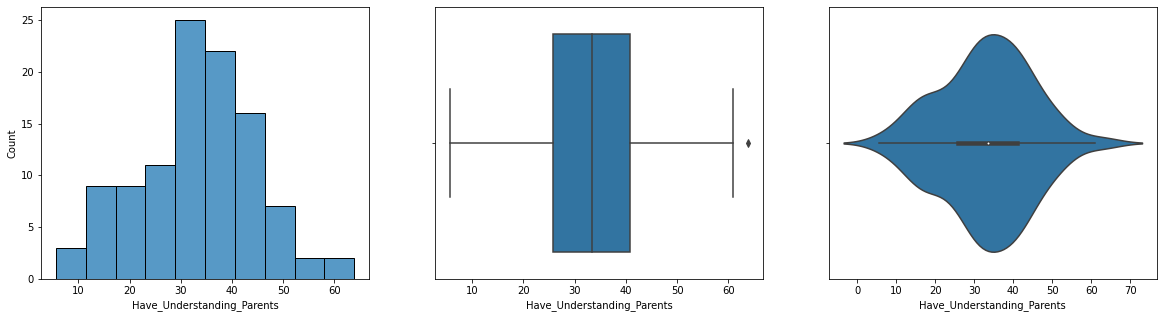

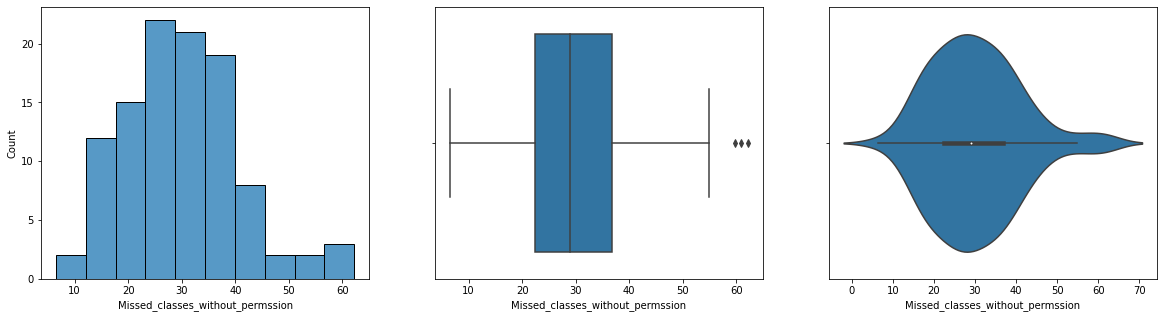

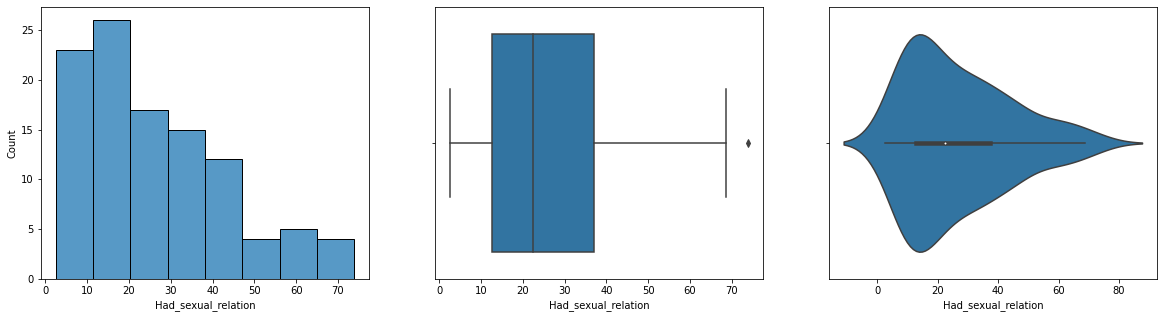

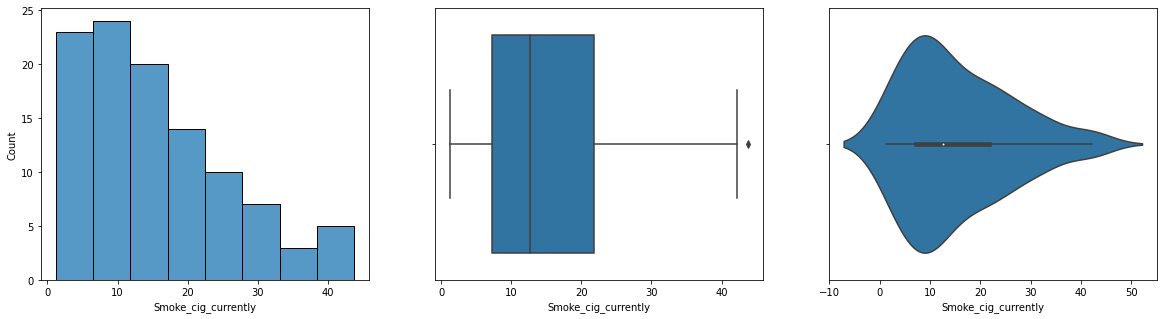

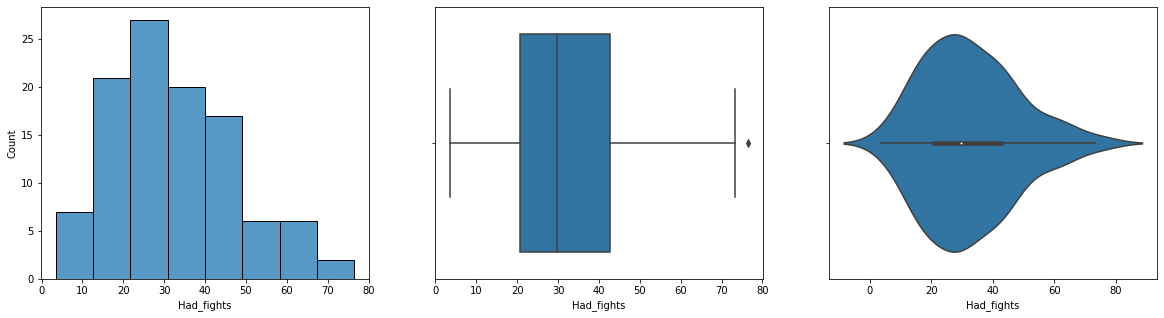

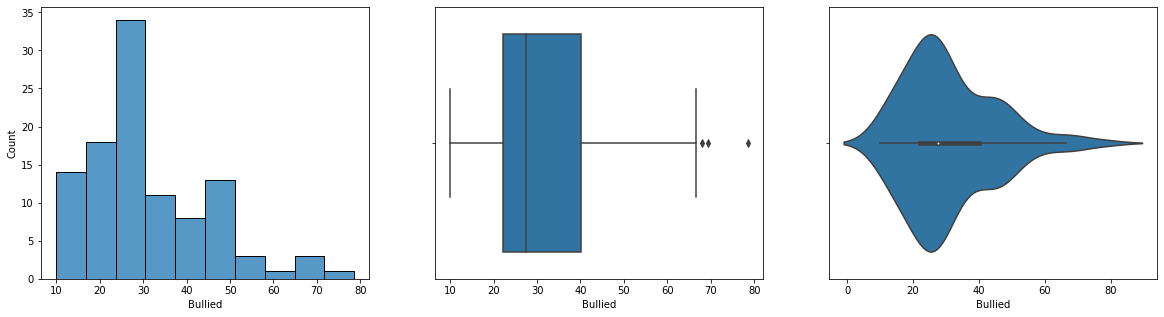

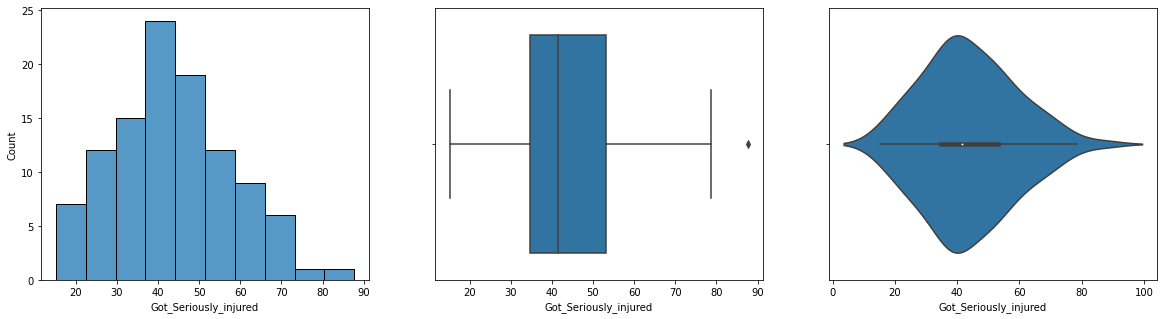

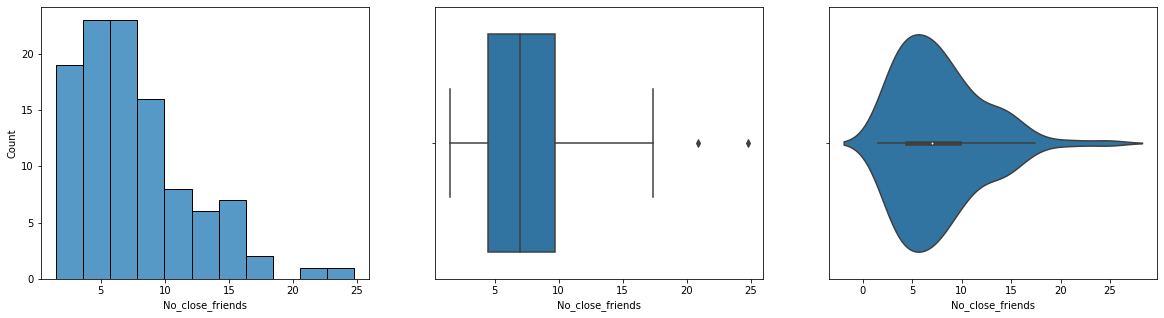

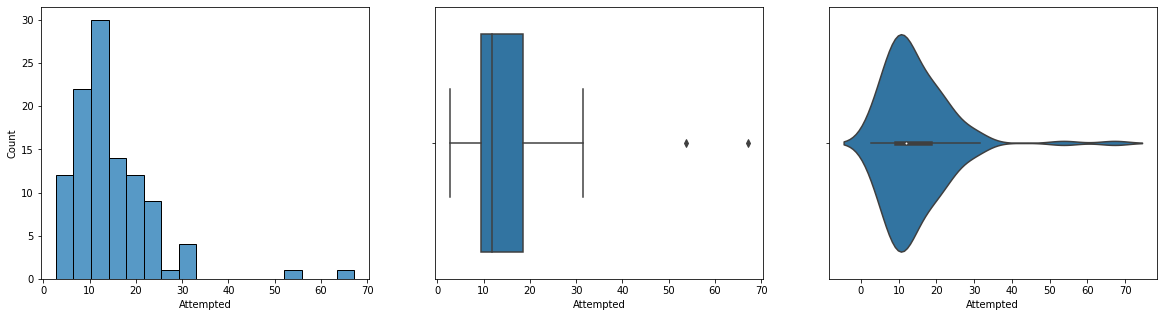

In [ ]:
# we can loop through the columns and plot them

for col in df_num.columns:
    fig, ax = plt.subplots(1, 3, figsize = (20, 5))
    sns.histplot(data = df_num, x = col, ax = ax[0])
    sns.boxplot(data = df_num, x = col, ax = ax[1])
    sns.violinplot(data = df_num, x = col, ax = ax[2])
 
plt.show()

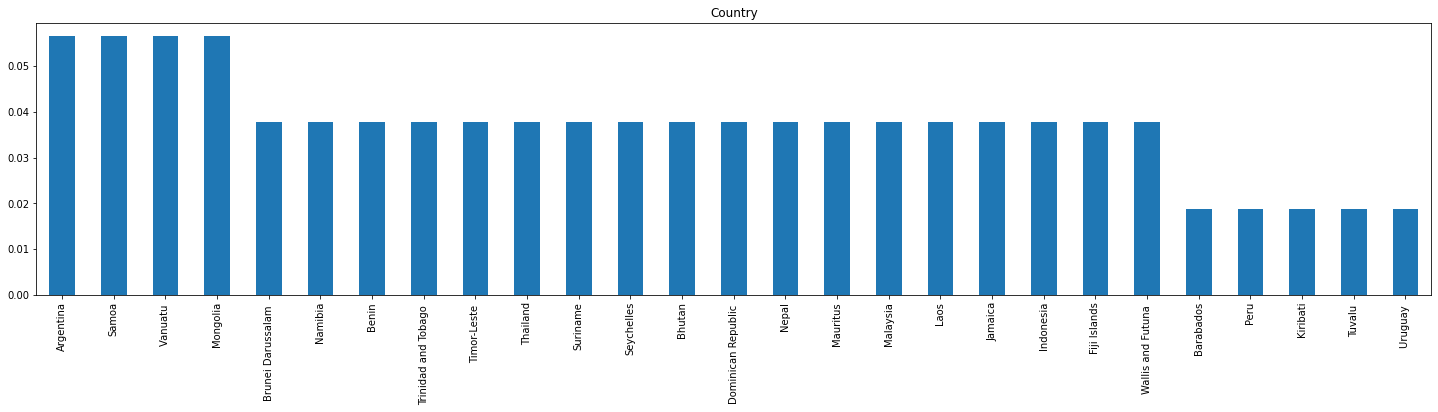

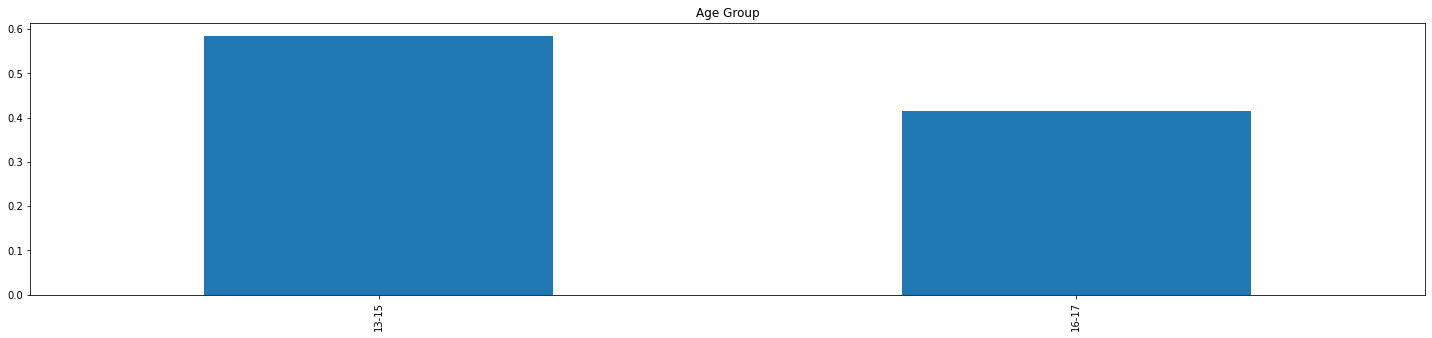

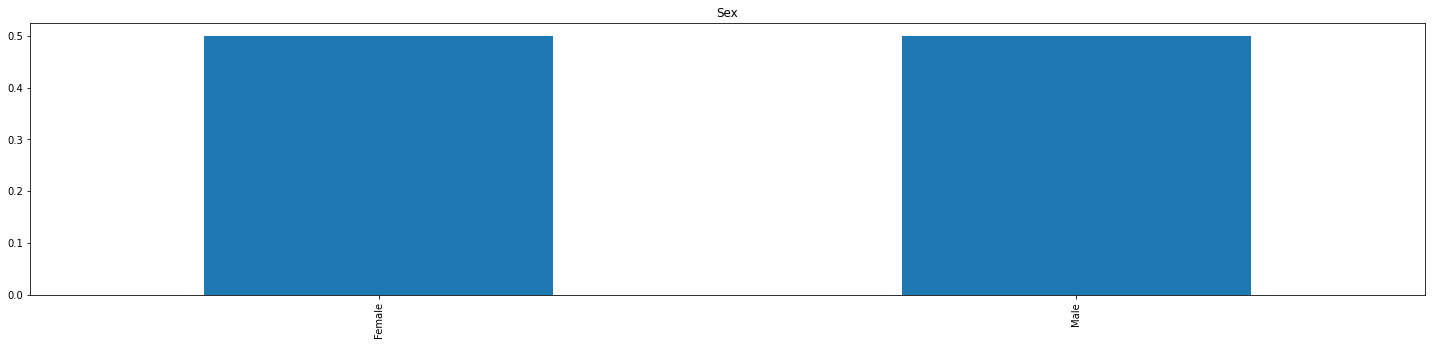

In [ ]:
# we can also plot the categorical data
df_cat = df.select_dtypes(include='object')

for col in df_cat.columns:
    fig, ax = plt.subplots(1, 1, figsize = (20, 5))
    df_cat[col].value_counts(normalize = True).plot.bar(figsize = (25, 5), title = col)

plt.show()

# Diagnostic Analysis

In [ ]:
# What is the percentage of students who have been bullied assuming they have no close friends?
df.groupby(['Bullied', 'No_close_friends'])[['Attempted']].mean().sort_values(by = 'Attempted', ascending = False)

,,Attempted
Bullied,No_close_friends,
78.6,17.4,67.2
69.4,14.9,53.7
32.2,2.1,31.5
60.0,7.9,30.3
47.9,13.0,29.9
...,...,...
9.9,5.5,3.8
24.0,4.0,3.7
19.0,2.4,3.6


In [ ]:
# what are the percentages of Attempted if they drink alcohol and also happen to smoke?
df.groupby(['Currently_Drink_Alcohol', 'Smoke_cig_currently'])[['Attempted']].mean().sort_values(by = 'Attempted', ascending = False)

,,Attempted
Currently_Drink_Alcohol,Smoke_cig_currently,
43.4,42.2,67.2
25.4,25.3,53.7
19.3,19.5,31.5
15.4,21.2,30.3
26.4,10.1,29.9
...,...,...
36.1,12.1,3.8
12.1,33.0,3.7
5.1,8.4,3.6


In [ ]:
# Let's try Age group and Had sexual relations
df.groupby(['Age Group', 'Had_sexual_relation'])[['Attempted']].mean().sort_values(by = 'Attempted', ascending = False)

Attempted
Age Group Had_sexual_relation           
13-15     68.5                      67.2
          44.9                      53.7
          9.8                       31.5
          32.3                      30.3
          49.8                      29.9
...                                  ...
16-17     24.7                       3.8
          7.4                        3.7
13-15     8.2                        3.6
          4.0                        3.6
16-17     2.5                        2.7

[97 rows x 1 columns]

In [ ]:
# does being having understanding parents matter if you are Overwieght?
df.groupby(['Overwieght', 'Have_Understanding_Parents'])[['Attempted']].mean().sort_values(by = 'Attempted', ascending = False)

,,Attempted
Overwieght,Have_Understanding_Parents,
43.4,30.0,67.2
59.1,36.7,53.7
46.4,15.4,31.5
12.8,13.9,30.3
6.3,40.2,29.9
...,...,...
10.3,15.5,3.8
12.6,30.2,3.7
52.2,19.6,3.6


In [ ]:
# who is more likely to attempt male or female?
df.groupby(['Sex', 'Overwieght'])[['Attempted']].mean().sort_values(by = 'Attempted', ascending = True)

Attempted
Sex    Overwieght           
Female 13.1              2.7
       52.2              3.6
       14.9              3.6
Male   12.6              3.7
       10.3              3.8
...                      ...
       31.9             29.8
       12.8             30.3
Female 46.4             31.5
       59.1             53.7
Male   43.4             67.2

[100 rows x 1 columns]

In [ ]:
# Lets see based on nationality
df.groupby(['Country', 'Sex'])[['Attempted']].mean().sort_values(by = 'Attempted', ascending = False)

Attempted
Country              Sex              
Samoa                Male    36.966667
                     Female  31.800000
Kiribati             Female  31.500000
                     Male    29.800000
Namibia              Male    27.550000
Vanuatu              Male    27.233333
Namibia              Female  24.100000
Dominican Republic   Female  22.200000
Peru                 Female  22.000000
Jamaica              Female  21.200000
Seychelles           Female  19.150000
Argentina            Female  18.733333
Vanuatu              Female  18.266667
Trinidad and Tobago  Female  17.700000
Suriname             Female  17.150000
Seychelles           Male    16.850000
Wallis and Futuna    Female  16.550000
Tuvalu               Male    16.300000
Barabados            Female  15.400000
Jamaica              Male    14.650000
Benin                Male    13.900000
Thailand             Male    13.750000
Mauritus             Female  13.700000
Dominican Republic   Male    12.200000
Fiji Islands         Male    12.200000
Bhutan               Female  12.150000
Peru                 Male    12.000000
Wallis and Futuna    Male    11.850000
Benin                Female  11.850000
Thailand             Female  11.650000
Argentina            Male    11.500000
Trinidad and Tobago  Male    11.300000
Nepal                Female  11.050000
Uruguay              Female  10.800000
Mongolia             Female  10.466667
Mauritus             Male    10.450000
Barabados            Male    10.400000
Bhutan               Male    10.300000
Suriname             Male     9.700000
Fiji Islands         Female   9.600000
Timor-Leste          Male     9.550000
Nepal                Male     8.400000
Mongolia             Male     8.033333
Timor-Leste          Female   8.000000
Brunei Darussalam    Female   7.750000
Uruguay              Male     7.400000
Malaysia             Female   7.050000
Laos                 Female   6.200000
Malaysia             Male     6.150000
Brunei Darussalam    Male     4.500000
Laos                 Male     4.350000
Indonesia            Male     4.050000
Tuvalu               Female   3.600000
Indonesia            Female   3.150000

In [ ]:
# since the data is categorical, we'll use LabelEncoder
from sklearn.preprocessing import LabelEncoder

# we'll be using the LabelEncoder from sklearn
le = LabelEncoder()

# the columns we'll be encoding are Country, Age Group, and Sex, all of them are Object data type which we can't use for training
df['Country'] = le.fit_transform(df['Country'])
df['Age Group'] = le.fit_transform(df['Age Group'])
df['Sex'] = le.fit_transform(df['Sex'])

# almost forgot to transform Year
df['Sex'] = le.fit_transform(df['Year'])

# check the data again
df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted
0,0,2018,0,8,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,27.55,27.5,4.8,19.9
1,0,2018,0,8,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,27.55,37.4,5.5,10.4
2,0,2018,1,8,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,27.55,30.1,6.3,17.4
3,0,2018,1,8,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,27.55,40.3,6.6,11.2
4,0,2012,0,2,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.10,24.8,6.1,12.9


In [ ]:
# data preprocessing
from sklearn.model_selection import train_test_split

# we'll be using the train_test_split from sklearn
X = df.drop('Attempted', axis = 1)

# we'll be using the Attempted column as our target
y = df['Attempted']

In [ ]:
df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted
0,0,2018,0,8,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,27.55,27.5,4.8,19.9
1,0,2018,0,8,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,27.55,37.4,5.5,10.4
2,0,2018,1,8,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,27.55,30.1,6.3,17.4
3,0,2018,1,8,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,27.55,40.3,6.6,11.2
4,0,2012,0,2,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.10,24.8,6.1,12.9


In [ ]:
# data splitting

# we'll be using the train_test_split from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

# since our data is a Regression problem, we'll be using Linear Regression
from sklearn.linear_model import LinearRegression

# we'll be using the LinearRegression from sklearn
lr = LinearRegression()

# training the model
lr.fit(X_train, y_train)

# checking the score
lr.score(X_test, y_test)

0.5600892743465448

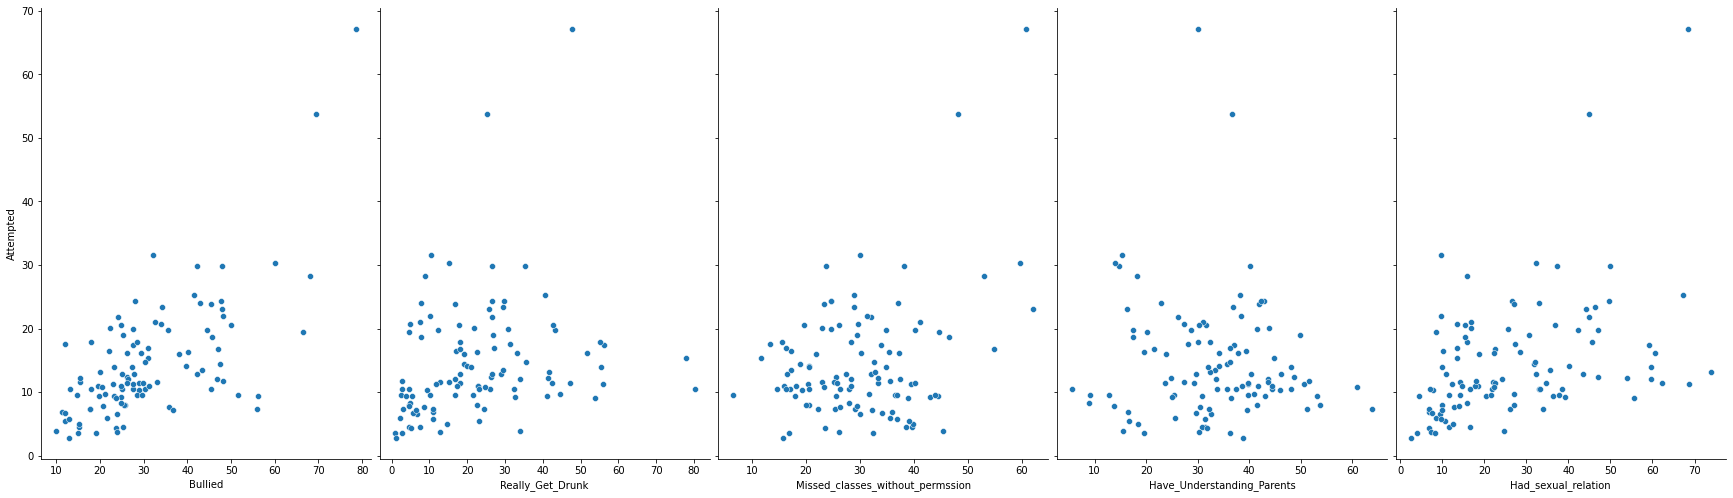

In [ ]:
sns.pairplot(df, x_vars=['Bullied', 'Really_Get_Drunk', 'Missed_classes_without_permssion', 'Have_Understanding_Parents', 'Had_sexual_relation'],
             y_vars='Attempted', height=7, aspect=0.7, kind='scatter')

In [ ]:
X = df['Bullied']
y = df['Attempted']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, test_size = 0.3, random_state = 42)

In [ ]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const     -4.768076
Bullied    0.712141
dtype: float64

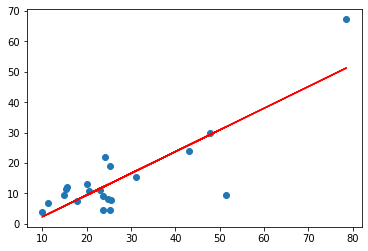

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, -4.768076 + 0.712141*X_train, 'r')
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


100    43.657522
10     26.067636
4      25.213066
81     15.029448
97     27.776774
dtype: float64

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.5527209017744581

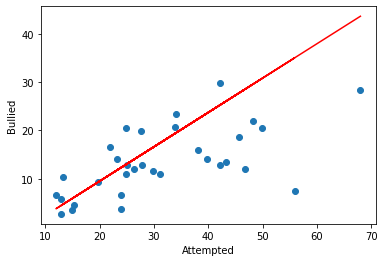

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.ylabel('Bullied')
plt.xlabel('Attempted')
plt.plot(X_test, y_test_pred, 'r')
plt.show()